# Data Visualisation

### Homework

Before you begin, remember to import the necessary libraries.

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()

#### Standard Exercises

In [3]:
rndm = pd.DataFrame({'day_number':range(1,90),
                     'pos_trend':np.random.rand(len(range(1,90)))*50 + range(1,90),
                     'neg_trend':np.random.rand(len(range(1,90)))*50 + 25 - range(1,90), })
rndm.head()

,day_number,pos_trend,neg_trend
0,1,10.044386,46.164574
1,2,49.253674,62.847976
2,3,30.695487,69.680851
3,4,46.977317,70.393081
4,5,10.401559,63.795929


1. Given the above DataFrame `rndm`, use Matplotlib to plot a linechart showing the evolution of the `pos_trend` variable. Then, on the same chart, plot also the `neg_trend` column.

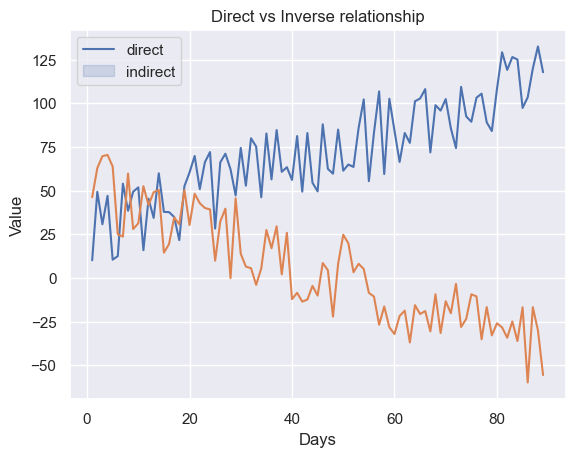

In [4]:
plot = sns.lineplot(rndm, x="day_number", y="pos_trend")
plot = sns.lineplot(rndm, x="day_number", y="neg_trend")
plot.set_title("Direct vs Inverse relationship")
plot.set_xlabel("Days")
plot.set_ylabel("Value")
plot.legend(labels=["direct", "indirect"])

2. Add a title, labels for the x- and y-axes and a legend as per the following instructions:
- title: "Direct vs Inverse relationship"
- xlabel: "Days"
- ylabel: "Value"
- legend: label the pos_trend as "direct" and the neg_trend as "inverse"; position it in the "upper left" corner

In [5]:
plot.set_title("Direct vs Inverse relationship")
plot.set_xlabel("Days")
plot.set_ylabel("Value")
plot.legend(["direct", "indirect"])

3. Using the Seaborn library, load the `diamonds` dataset and save it to a DataFrame object named `dd`. Check the contents of the dataset.  

In [6]:
dd = sns.load_dataset(name="diamonds")
print(dd.head(), dd.dtypes)
print(dd.columns, dd.shape)

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75 carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object') (53940, 10)


4. Create a new DataFrame having the average `carat` and `price` grouped by the `clarity` of the diamond. (hint: check out [this guide](https://4cs.gia.edu/en-us/diamond-clarity/) for a reference on what each clarity category name means. *(hint: the carat of a stone represents its size)*

In [7]:
grouped_by_clarity = dd[["clarity", "carat", "price"]].groupby(by="clarity").mean()
grouped_by_clarity.head()

/var/folders/xj/lr3z9ff569d7srgh4sc80dr80000gq/T/ipykernel_6124/1564017278.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_clarity = dd[["clarity", "carat", "price"]].groupby(by="clarity").mean()


,carat,price
clarity,,
IF,0.505123,2864.839106
VVS1,0.503321,2523.114637
VVS2,0.596202,3283.737071
VS1,0.727158,3839.455391
VS2,0.763935,3924.989395


5. Create a bar chart showing the average `price` per `clarity` category. Then create a second chart showing the average `carat` per `clarity` category. Comment the results of the two charts in relation to the meaning of each clarity category name. 

Text(0, 0.5, 'price (USD)')

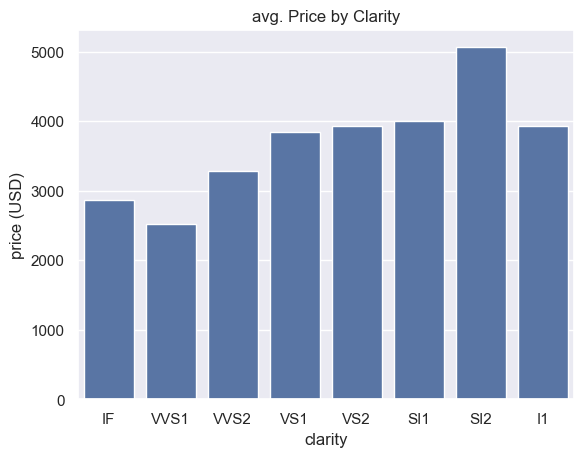

In [8]:
price_chart = sns.barplot(grouped_by_clarity["price"])
price_chart.set_title("avg. Price by Clarity")
price_chart.set_ylabel("price (USD)")

Text(0.5, 1.0, 'ø carat by clarity')

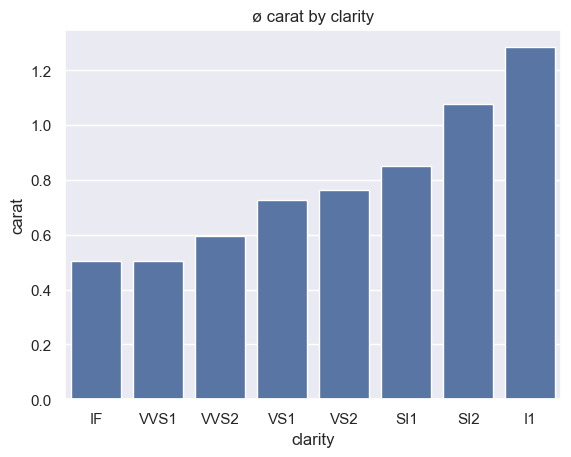

In [9]:
carat_chart = sns.barplot(grouped_by_clarity["carat"])
carat_chart.set_title("ø carat by clarity")

6. Let's investigate this further. Using the `dd` DataFrame, produce a scatterplot showing the relationship between the `carat` (on the x-axis) and the `price` (on the y-axis). Then, use the `clarity` variable to change the color of each circle (that is, of each diamond) in the chart. How can you interpret this chart visually, particularly in relation to the previous point?

Text(0.5, 1.0, 'Corellation between carat and price')

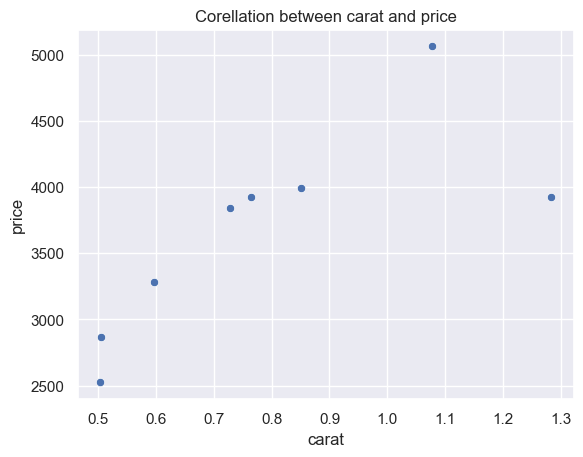

In [10]:
plot = sns.scatterplot(data=grouped_by_clarity, x="carat", y="price")
plot.set_title("Corellation between carat and price")

#### Advanced Exercises

You are free to use whichever data visualisation library you prefer, although the Seaborn library is the recommended option.

1. Load the `taxis` dataset from the `seaborn` example dataset repository and call it `taxi`.

In [11]:
taxi = sns.load_dataset("taxis")
print(taxi.columns, taxi.dtypes)
print(taxi.shape)

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object') pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object
(6433, 14)


2. Depending on the library version you have installed, the data type of the `pickup` and `dropoff` columns, may or may not be interpreted as date-times. Check the data type of the variables in the dataset and in case these are interpreted as strings (object data type), convert those two columns to date-time (remember to assign the result back to the column itself!). *(hint: check out [this Stack Overflow page](https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime) for a tip on how to do it)*

In [12]:
taxi["pickup"] = pd.to_datetime(taxi["pickup"])
taxi["dropoff"] = pd.to_datetime(taxi["dropoff"])

In [13]:
print(taxi.dtypes)

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object


Given a date-time column, you can **extract a date-part** from it using the `dt` accessor. Say we wanted to create a new column called `pickup_date` where we [extract the date](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html) from the `pickup` date-time object, we would write (run the cell below): 

In [14]:
# run this cell (do not delete)!
taxi['pickup_date'] = taxi['pickup'].dt.date

3. Given what you just read, create: 
- a new column named `pickup_weekday` where you [extract the day of the week](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.weekday.html) from the `pickup` date; 
- a new column named `pickup_hour` where you [extract the hour of the day](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.hour.html)

In [15]:
taxi["pickup_weekday"] = taxi["pickup"].dt.weekday
taxi["pickup_hour"] = taxi["pickup"].dt.hour

4. Create a bar chart that shows the number of rides that happened in each day of the week. Which day of the week is the busiest? *(hint: check out the documentation to find out which number corresponds to which weekday)*

/var/folders/xj/lr3z9ff569d7srgh4sc80dr80000gq/T/ipykernel_6124/1913236168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot_by_weekday.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])


[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

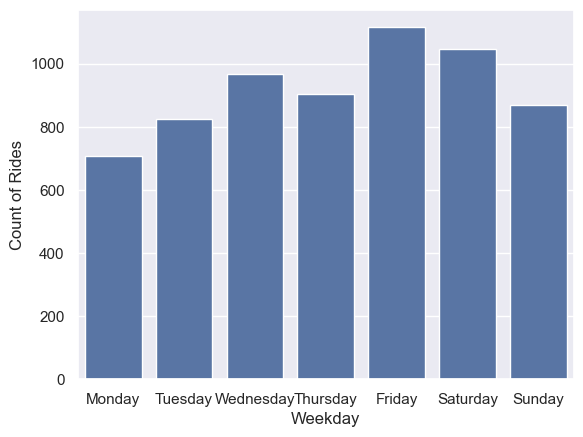

In [36]:
plot_by_weekday = sns.countplot(data=taxi, x="pickup_weekday")
plot_by_weekday.set_xlabel("Weekday")
plot_by_weekday.set_ylabel("Count of Rides")
plot_by_weekday.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

5. Create a bar chart that shows the number of rides that happened in each hour of the day. Which hour of the day is the busiest?

Text(0, 0.5, 'Count of rides')

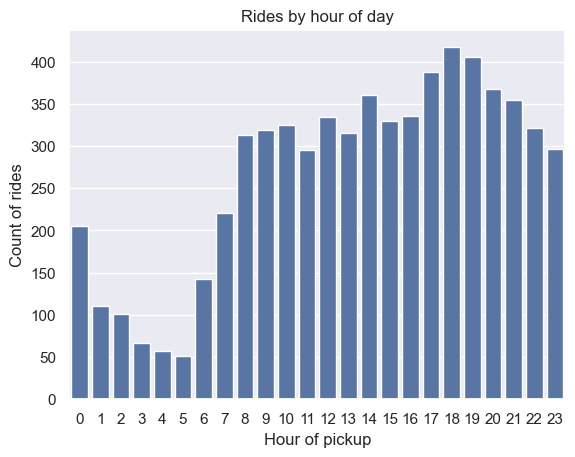

In [38]:
plot = sns.countplot(data=taxi, x="pickup_hour")
plot.set_title("Rides by hour of day")
plot.set_xlabel("Hour of pickup")
plot.set_ylabel("Count of rides")

6. Add a new column to the DataFrame called `tip_pct` that is the percentage of the `tip` relative to the `fare`. Then produce a bar chart that shows the average `tip_pct` by `pickup_zone`. Which borough tips the most relative to the fare paid? Would the ranking have changed if we just looked at the absolute tip value?

In [41]:
taxi["tip_pct"] = taxi["tip"] / taxi["fare"] * 100

               pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough pickup_date  \
0    UN/Turtle Bay South      Manhattan       Manhattan  2019-03-23   
1  U

83


/var/folders/xj/lr3z9ff569d7srgh4sc80dr80000gq/T/ipykernel_6124/2908254267.py:1: FutureWarning: The provided callable <function mean at 0x1154be660> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tips_by_pickup = taxi.groupby(by="pickup_zone").agg({ "tip_pct": np.mean }).sort_values(by="tip_pct", ascending=False)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Hudson Sq'),
  Text(1, 0, 'Union Sq'),
  Text(2, 0, 'Lenox Hill West'),
  Text(3, 0, 'Upper West Side North'),
  Text(4, 0, 'Little Italy/NoLiTa'),
  Text(5, 0, 'Manhattan Valley'),
  Text(6, 0, 'East Harlem South'),
  Text(7, 0, 'Murray Hill-Queens'),
  Text(8, 0, 'Clinton Hill'),
  Text(9, 0, 'Flushing'),
  Text(10, 0, 'Claremont/Bathgate'),
  Text(11, 0, 'Flatbush/Ditmas Park')])

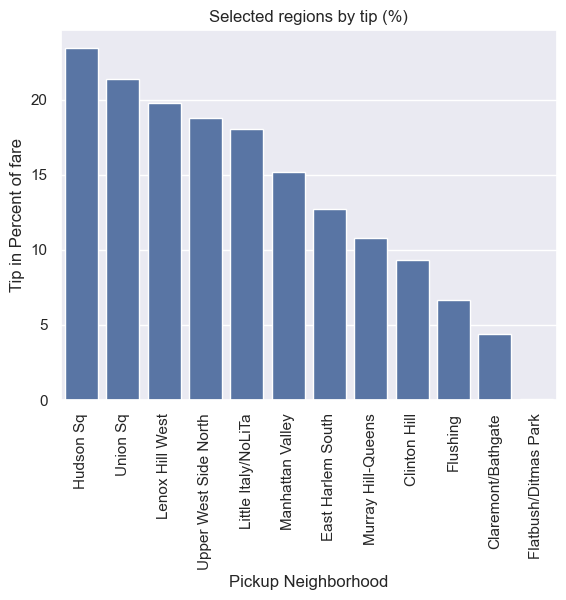

In [85]:
tips_by_pickup = taxi.groupby(by="pickup_zone").agg({ "tip_pct": np.mean }).sort_values(by="tip_pct", ascending=False)
with_0_tips = tips_by_pickup[tips_by_pickup["tip_pct"] == 0].value_counts()[0]
print(with_0_tips)
tips_by_pickup = tips_by_pickup[tips_by_pickup["tip_pct"] != 0]
# this is all data, but that's too crowded, sorry!
# sns.barplot(tips_by_pickup, x="pickup_zone", y="tip_pct")
pickup_region = sns.barplot(tips_by_pickup[::10], x="pickup_zone", y="tip_pct")
pickup_region.set_title("Selected regions by tip (%)")
pickup_region.set_xlabel("Pickup Neighborhood")
pickup_region.set_ylabel("Tip in Percent of fare")
plt.xticks(rotation=90)

83


/var/folders/xj/lr3z9ff569d7srgh4sc80dr80000gq/T/ipykernel_6124/2573420574.py:1: FutureWarning: The provided callable <function mean at 0x1154be660> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tips_by_pickup = taxi.groupby(by="pickup_zone").agg({ "tip": np.mean }).sort_values(by="tip", ascending=False)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Flushing Meadows-Corona Park'),
  Text(1, 0, 'TriBeCa/Civic Center'),
  Text(2, 0, 'Union Sq'),
  Text(3, 0, 'Midtown Center'),
  Text(4, 0, 'Midtown North'),
  Text(5, 0, 'Brooklyn Heights'),
  Text(6, 0, 'Two Bridges/Seward Park'),
  Text(7, 0, 'Steinway'),
  Text(8, 0, 'Murray Hill-Queens'),
  Text(9, 0, 'East New York'),
  Text(10, 0, 'Van Nest/Morris Park'),
  Text(11, 0, 'Flatbush/Ditmas Park')])

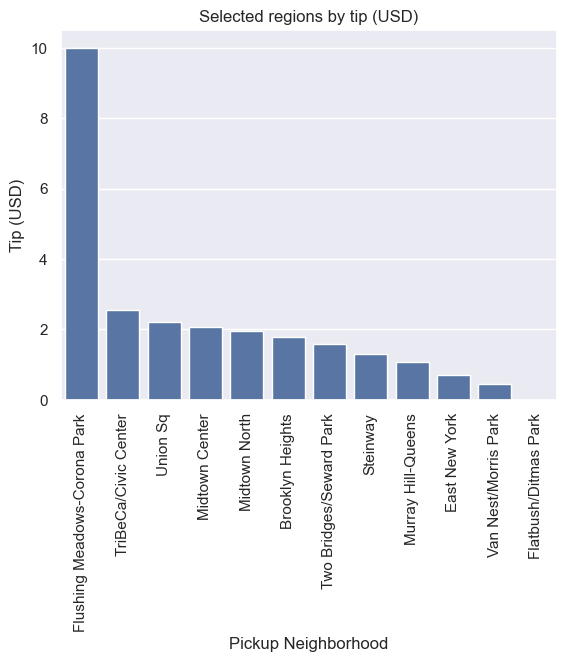

In [88]:
tips_by_pickup = taxi.groupby(by="pickup_zone").agg({ "tip": np.mean }).sort_values(by="tip", ascending=False)
with_0_tips = tips_by_pickup[tips_by_pickup["tip"] == 0].value_counts()[0]
print(with_0_tips)
tips_by_pickup = tips_by_pickup[tips_by_pickup["tip"] != 0]
# this is all data, but that's too crowded, sorry!
# sns.barplot(tips_by_pickup, x="pickup_zone", y="tip")
pickup_region = sns.barplot(tips_by_pickup[::10], x="pickup_zone", y="tip")
pickup_region.set_title("Selected regions by tip (USD)")
pickup_region.set_xlabel("Pickup Neighborhood")
pickup_region.set_ylabel("Tip (USD)")
plt.xticks(rotation=90)

7. Create a copy of the `taxi` DataFrame and call it `taxi_tip`. Then filter this new DataFrame so to only keep rows where the `tip` is greater than 0 (remember to assign the resulting DataFrame to itself in order to save the filtered view). 

In [89]:
taxi_tip = taxi[taxi["tip"] > 0]

(6433, 18) (4122, 18)


8. Create a scatterplot showing the **relationship** between `fare` (on the x-axis) and `tip` (on the y-axis). Give a title to the chart and reset teh x- and y-axis labels to "Ride Fare" and "Ride Tip" respectively. 

Text(0.5, 1.0, 'Tips vs. Fare')

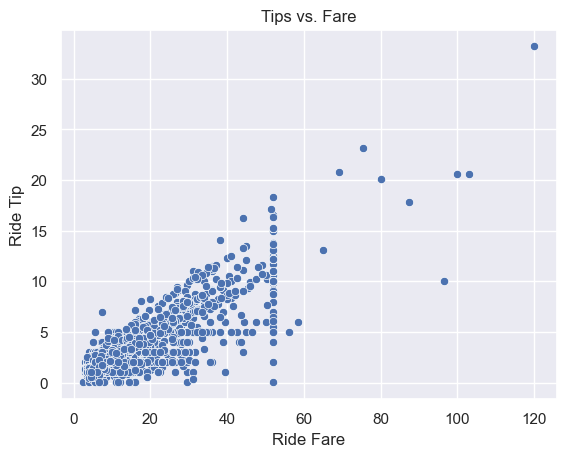

In [92]:
tips_over_fare = sns.scatterplot(taxi_tip, x="fare", y="tip")
tips_over_fare.set_xlabel("Ride Fare")
tips_over_fare.set_ylabel("Ride Tip")
tips_over_fare.set_title("Tips vs. Fare")

9. The default settings of the scatterplot draw for each observation a solid circle with a white border. This can be quite heavy on the eye, especially if there are many observations close to each other. Look at the [documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) of the `sns.scatterplot()` function and use the `linewidth` and the `alpha` parameters to remove the white border and increase the transparency of each circle in the chart. 

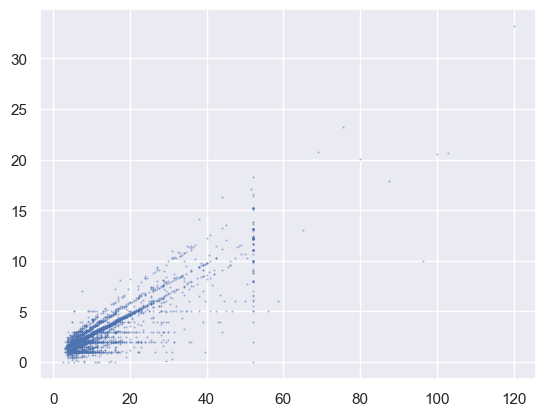

In [116]:
# sorry, with sns.scatterplot there is no specific option to style the markers except for type
# this is using matplotlib alone:
plt.scatter(x=taxi_tip["fare"], y=taxi_tip["tip"], marker="o", alpha=0.5, linewidths=0, s=2)

10. Notice that between the Ride Fare values of 50 and 60 dollars, there is a vertical cluster of rides with the same fare amount (and different tip values). What is the exact value of this cluster anomaly? What do you think that is? *(hint: these fares are from NYC taxi rides, try to do a research on Google to see if you can find out more about it)*

In [142]:
# I'm guessing it's the JFK airport ride, let's confirm!
only_50_buck_rides = taxi[taxi["fare"] >= 52]
only_50_buck_rides = only_50_buck_rides[["dropoff_zone", "pickup_zone"]]
dropoff_count = only_50_buck_rides["dropoff_zone"].value_counts().loc["JFK Airport"]
pickup_count = only_50_buck_rides["pickup_zone"].value_counts().loc["JFK Airport"]

print(f"{dropoff_count} rides to JFK, {pickup_count} rides from JFK, total of {dropoff_count + pickup_count} out of {len(only_50_buck_rides)} that cost exactly 52 USD")

45 rides to JFK, 87 rides from JFK, total of 132 out of 182 that cost exactly 52 USD
